In [1]:
import pandas as pd 

import numpy  as np

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [2]:
#sns.set_palette(palette="deep", n_colors=4, desat=None, color_codes=False)
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(10,6))


In [3]:
df = pd.read_csv("First_100_Cases_2.csv", encoding ='cp1256')

In [4]:
df.columns

Index(['No', 'Age', 'Gender ', 'Age_Cat ', 'Locality_Cat', 'Locality',
       'Address ', 'Symptoms_Date', 'Cases_by_Months', 'week',
       'Cases_by_Weeks', 'Fever', 'Cough ', 'Short_Breath ', 'Sore_Throat  ',
       'Headache ', 'stateofsympt', 'Isolation_Place', 'Case_Order   ',
       'Close_Contact_With'],
      dtype='object')

In [5]:
df.shape

(100, 20)

In [6]:
df.head()

,No,Age,Gender,Age_Cat,Locality_Cat,Locality,Address,Symptoms_Date,Cases_by_Months,week,Cases_by_Weeks,Fever,Cough,Short_Breath,Sore_Throat,Headache,stateofsympt,Isolation_Place,Case_Order,Close_Contact_With
0,1,40,1,30-44.9,AL Gabaleen,1,???????,28-04-20,4,1.000000,1,1,1,0,0.0,1.0,3,1,2.0,45
1,2,40,0,30-44.9,Rabak,2,????48,28-04-20,4,1.000000,1,1,1,0,1.0,1.0,4,1,3.0,NaN
2,3,23,1,15-29.9,AL Gabaleen,1,????,28-04-20,4,1.000000,1,0,1,1,1.0,1.0,4,-1,4.0,16
3,4,38,0,30-44.9,Rabak,2,? 2,11/5/2020,5,2.857143,3,0,0,0,0.0,0.0,0,0,7.0,NaN
4,5,29,1,15-29.9,Rabak,2,? 21,15-05-20,5,3.428571,3,0,0,0,0.0,0.0,0,0,5.0,NaN


In [7]:
df['Symptoms_Date'] = pd.to_datetime(df.Symptoms_Date.str.replace("-", "/").str.replace("2020", "20"), format='%d/%m/%y')

In [8]:
df2= df[df.Age > 18]
df2.shape

(97, 20)

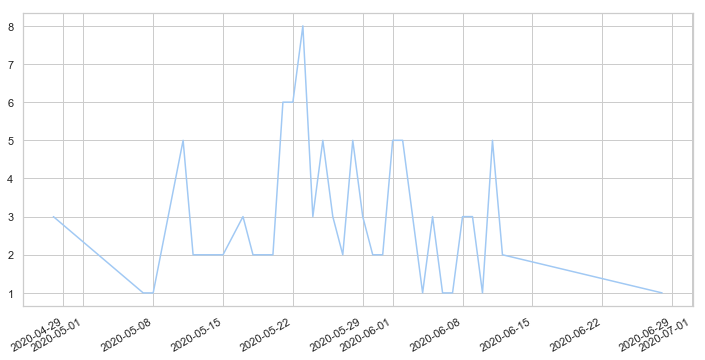

In [9]:
plt.figure(figsize=(12, 6))
df.Symptoms_Date.value_counts().plot()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


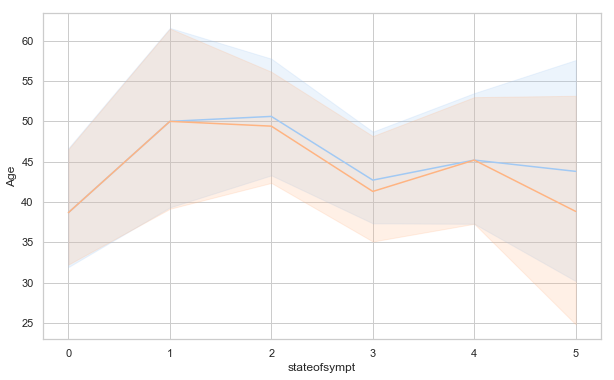

In [10]:
sns.lineplot(x="stateofsympt", y="Age",hue=None,data=df2 )
sns.lineplot(x="stateofsympt", y="Age",hue=None,data=df )

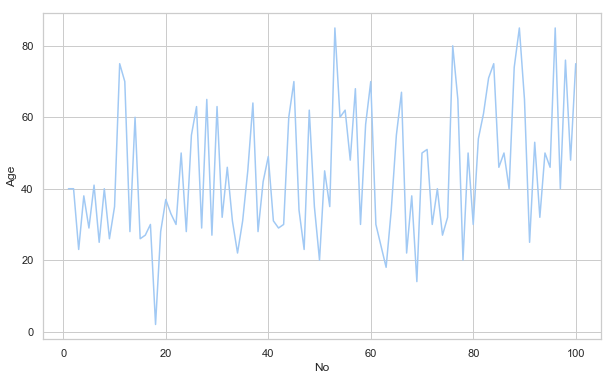

In [11]:
sns.lineplot(x="No", y="Age",hue=None,data=df)

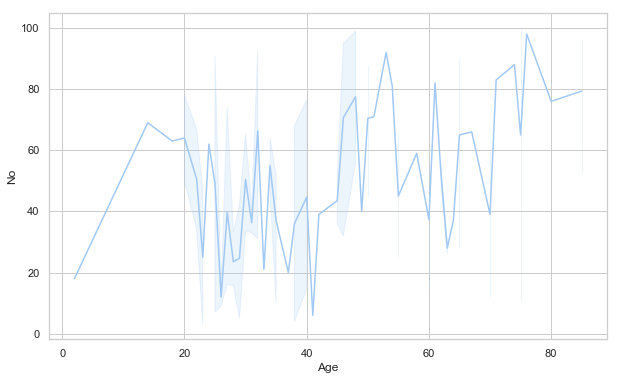

In [12]:
sns.lineplot(x="Age", y="No",hue=None,data=df)

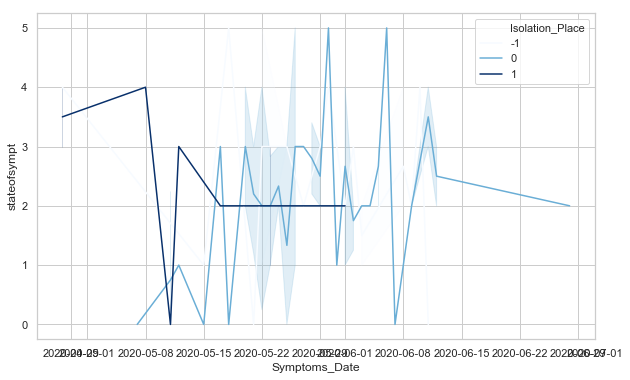

In [13]:
g = sns.lineplot(x="Symptoms_Date", y="stateofsympt", hue="Isolation_Place",data=df, palette = "Blues")
#sns.lineplot(x="week", y="Age", hue="Isolation_Place",data=df)
#g.set_xticklabels(rotation=30)

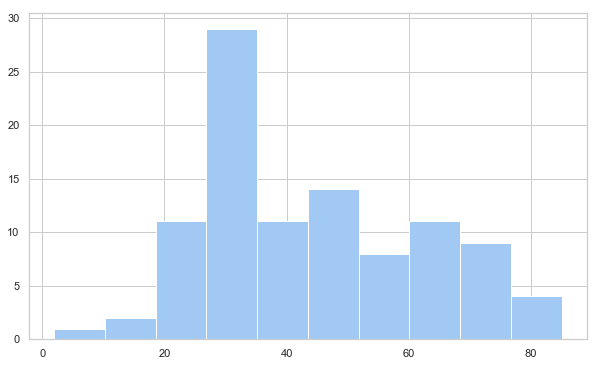

In [14]:
df.Age.hist()

In [15]:
df[df.Age==2]

,No,Age,Gender,Age_Cat,Locality_Cat,Locality,Address,Symptoms_Date,Cases_by_Months,week,Cases_by_Weeks,Fever,Cough,Short_Breath,Sore_Throat,Headache,stateofsympt,Isolation_Place,Case_Order,Close_Contact_With
17,18,2,1,01-04.9,AL Salam,5,???????,2020-05-12,5,3.0,3,1,1,1,0.0,0.0,3,1,NaN,0


In [16]:
df.Locality_Cat.unique()

array(['AL Gabaleen', 'Rabak', 'Kosti', 'AL Gitina', 'AL Salam',
       'Tandalti', 'AL Dowaim', 'Galy'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE6D6F08D0>]],
      dtype=object)

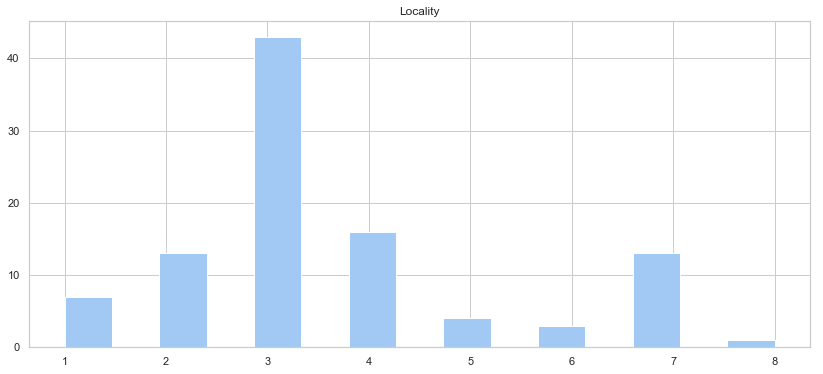

In [17]:
#df['revenue'].hist(bins=10)
df.hist(column=["Locality"],bins=15,figsize=(14,6))

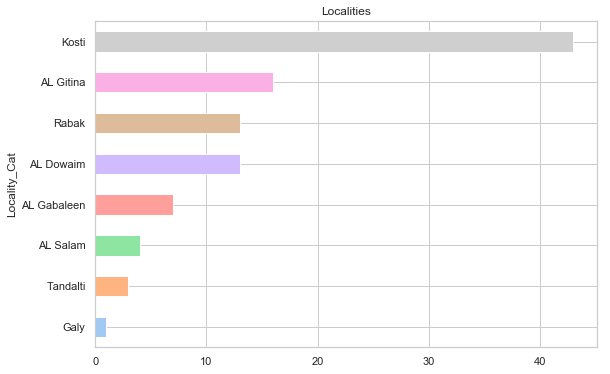

In [18]:
df.groupby(['Locality_Cat'])["Locality"].count().sort_values().plot(kind='barh',
         figsize=(9,6), title="Localities")

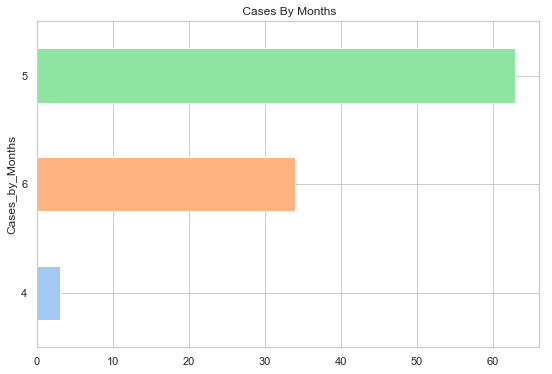

In [19]:
df.groupby(['Cases_by_Months'])["Cases_by_Months"].count().sort_values().plot(kind='barh',
         figsize=(9,6), title=" Cases By Months")

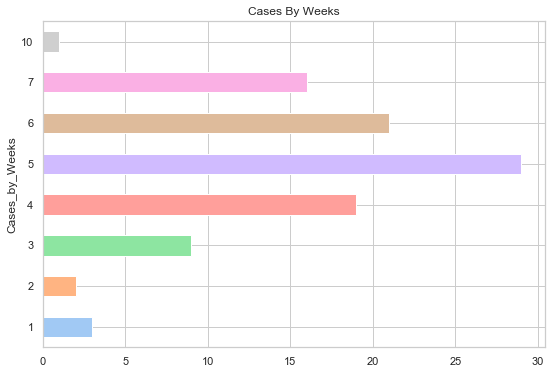

In [20]:
df.groupby(['Cases_by_Weeks'])["Cases_by_Weeks"].count().plot(kind='barh',
         figsize=(9,6), title="Cases By Weeks")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BE6D84ACC0>]],
      dtype=object)

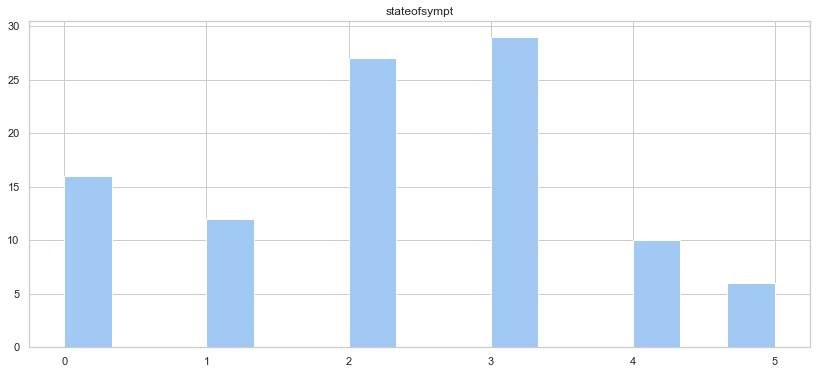

In [21]:
df.hist(column=["stateofsympt"],bins=15,figsize=(14,6))

In [22]:
df.stateofsympt.value_counts().sort_values()

5     6
4    10
1    12
0    16
2    27
3    29
Name: stateofsympt, dtype: int64

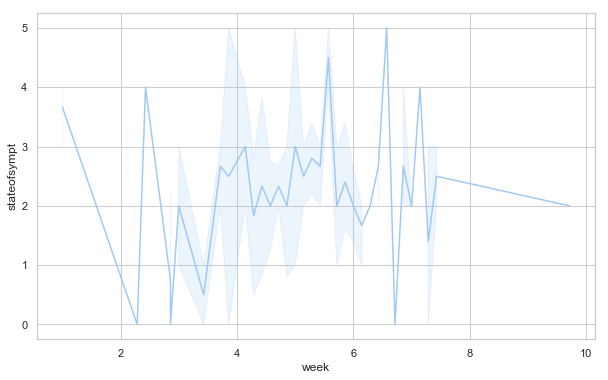

In [23]:
sns.lineplot(x="week", y="stateofsympt",hue=None,data=df)


In [24]:
#!pip install yellowbrick


In [25]:
from yellowbrick.datasets.loaders import load_occupancy
import warnings
warnings.filterwarnings('ignore')
X, y = load_occupancy()
from sklearn import svm
random_state = np.random.RandomState(10)
model = svm.LinearSVC(random_state=random_state)
model.fit(X,y)
model.score(X,y)

C:\Users\fakhr\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.9304961089494164

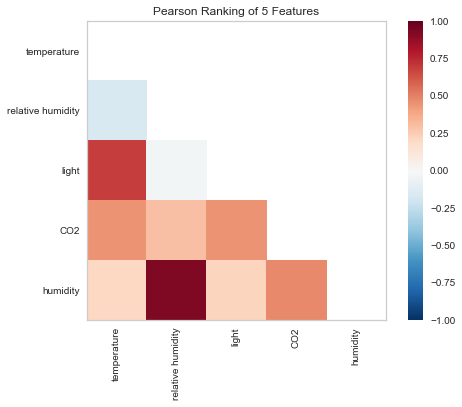

In [26]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X, y)           
visualizer.transform(X)        
visualizer.show()   

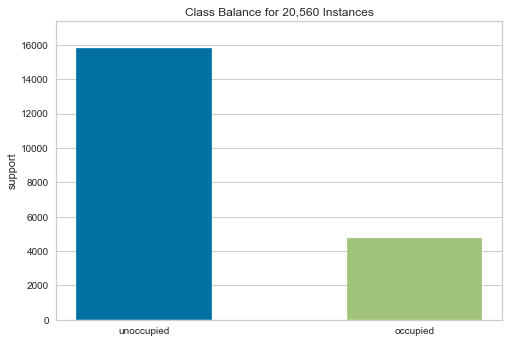

In [27]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=["unoccupied", "occupied"])
visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

0.9304961089494164

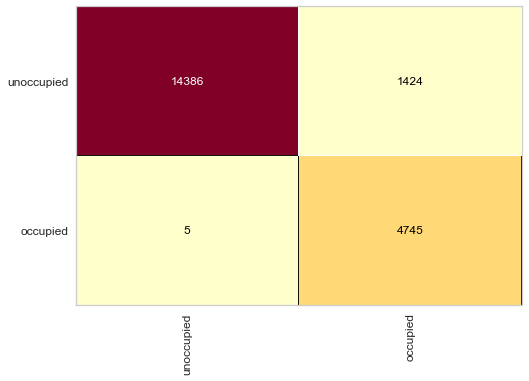

In [28]:
from yellowbrick.classifier import ConfusionMatrix
labels=["unoccupied", "occupied"]
cm = ConfusionMatrix(model, classes=labels)
cm.fit(X, y)
cm.score(X, y)



No handles with labels found to put in legend.


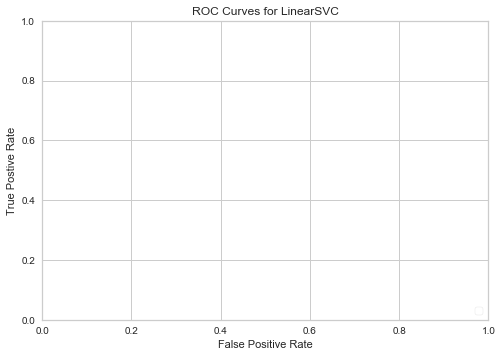

In [29]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model, classes=labels)
visualizer.fit(X, y)        
#visualizer.score(X, y)        
visualizer.show()  

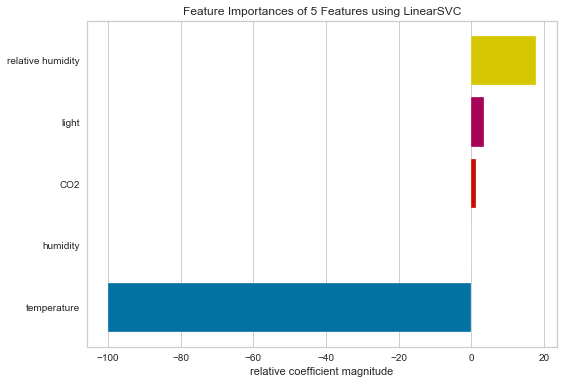

In [30]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

ValueError: Invalid parameter occupied for estimator LinearSVC(random_state=<mtrand.RandomState object at 0x0000029B2F37F900>). Check the list of available parameters with `estimator.get_params().keys()`.

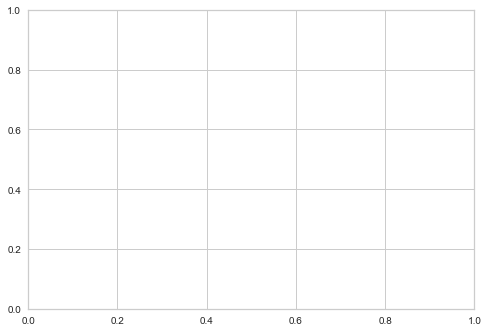

In [48]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(model, param_name="occupied", param_range=param_range,
                      logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,)

viz.fit(X, y)
viz.show()

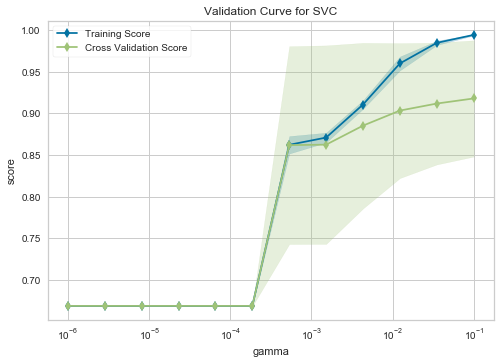

In [49]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold

# Load a classification data set
#X, y = load_game()

# Encode the categorical data with one-hot encoding
X = OneHotEncoder().fit_transform(X)

# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X, y)
viz.show()

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

#Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

visualizer = LearningCurve(
    model, cv=cv, scoring='f1', train_sizes=sizes, 
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure